### 练习-手写数字识别

In [1]:
#导入需要使用的库
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier
import joblib#加载之前用同样的joblib库保存的机器学习模型进行预测服务,
from collections import Counter#计数

In [2]:
def show_digit(idx):

    # 加载数据
    data = pd.read_csv('data/手写数字识别.csv')
    if idx < 0 or idx > len(data) - 1:
        return
    #如果idx小于0或者大于数据长度,直接返回,不执行后续代码目的是防止idx索引超出实际数据范围,避免报错
    x = data.iloc[:, 1:]#样本
    y = data.iloc[:,0]#标签
    print('当前数字的标签为:',y[idx])

    # data 修改为 ndarray 类型
    data_ = x.iloc[idx].values
    # 将数据形状修改为 28*28
    # 因为数据是一列的形式储存的,所以需要重排
    data_ = data_.reshape(28, 28)
    # 关闭坐标轴标签
    plt.axis('off')
    # 显示图像
    plt.imshow(data_)#mshow函数会根据数组值绘制对应的像素点,形成完整的图像
    plt.show()

In [3]:
def train_model():

    # 1. 加载手写数字数据集
    data = pd.read_csv('data/手写数字识别.csv')
    x = data.iloc[:, 1:] / 255
    y = data.iloc[:, 0]

    # 2. 打印数据基本信息
    print('数据基本信息:', x.shape)
    print('类别数据比例:', Counter(y))

    # 3. 分割数据集
    split_data = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)
    #test_size=0.2表示训练集与测试集八二开
    #stratify=y表示的是分层抽样,保持不同类别在训练集测试集中的比例分布一致,提高模型在各个类别上的泛化能力,避免某些少见类别样本过少影响结果
    #random_state=0是设置随机种子为0,这其实是一种伪随机,为的是更方便的复现结果
    x_train, x_test, y_train, y_test = split_data

    # 4. 模型训练
    estimator = KNeighborsClassifier(n_neighbors=3)#knn=3
    estimator.fit(x_train, y_train)

    # 5. 模型评估
    acc = estimator.score(x_test, y_test)
    print('测试集准确率: %.2f' % acc)

    # 6. 模型保存
    joblib.dump(estimator, 'model/knn.pth')#保存模型的结果,等于已经训练完成,方便后续自己调用

In [4]:
def test_model():
    # 读取图片数据
    import matplotlib.pyplot as plt
    import joblib
    img = plt.imread('temp/demo.png')#plt.imread()是Matplotlib中的图像读取函数,返回的Numpy ndarray形式的数据,包含图片的像素值数据
#没有找到相关的测试图片,所以运行的时候回报错
    plt.imshow(img)
    # 加载模型
    knn = joblib.load('model/knn.pth')
    y_pred = knn.predict(img.reshape(1, -1))
    print('您绘制的数字是:', y_pred)

当前数字的标签为: 0


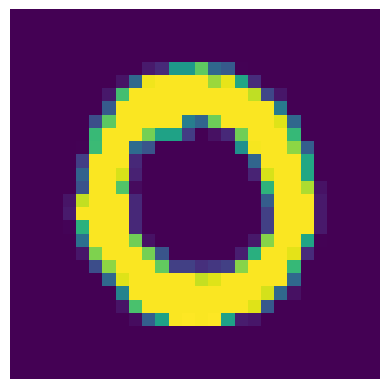

数据基本信息: (42000, 784)
类别数据比例: Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})
测试集准确率: 0.97


FileNotFoundError: [Errno 2] No such file or directory: 'temp/demo.png'

In [8]:
if __name__ == '__main__':
        # 显示部分数字
    show_digit(1)
    # 训练模型
    train_model()
    # 测试模型
    test_model()